# Linear Regression - Classical appoach

The objective of this notebook is to introduce the *classical approach to linear regression*. It will help you understand:
* When you would use a classical statistical approach as opposed to a *machine learning* approach
* How to implement classic linear regression in python
* How to use the [statsmodels](https://www.statsmodels.org/stable/index.html) library
* How to select variables to include in a model using a classical *model selection* approach
* How to implement and interpret residual plots for model checking

# Excercise 1 - defining types of problems

Write down, for each case below, whether you would use a **classical statistical** approach or a **ML prediction** approach to solve the problem.

1. A company approaches you who are interested in conducting a direct-marketing campaign. The goal is to identify individuals who will respond positively to a mailing, based on observations of demographic variables measured on each individual. They will then only mail those who they think will respond positively to mailing in order to have maximum impact for minimum cost.

<img src="./images/letters.jpg" width="300px">


2. You have been contacted by Nicolas Cage. He has many offers for roles in new upcoming movies but cannot accept them all. He wishes to use historical data to determine which of the movies being offered are likely to be the greatest success. He defines sucess as the greater amount of money a movie made. He explains he wants to know which factors, i.e. number of award winning actresses, budget, movie length etc, are most important in determining a movies' success.

<img src="./images/Nic.jpg" width="300px">


3. An international charity "Water for All" has contacted you. They have been collecting usage, current status (working/not-working) & maintence data on rural-community water pumps across several countries in Africa. They wish to know if it possible to use mathmatical models to understand when future failure of each water pump will occur. This will allow them to dispatch their teams in advance to provide protective maintenance to prevent the pump failure.

<img src="./images/water_pump.jpg" width="300px">


4. You have just been employed by the Grenoble police department as their first data scientist. They are excited for you to arrive as they have been told by a very expensive management consulant that 'data science' is the future of policing. They have collated all information they have on the dates, times, geographic location and hand written reports of historical crimes in Grenoble over the last decade. They are waiting for you to tell them where the next crime will happen so they can dispatch their officers in advance to catch the bad guys before the crime occurs!


5. *The Irresistable Cholocolate Company* has begun testing new recipes of chocolate. They have hired Sean Bean as their new head of research. With his insistence their consumer model is now to make chocolate so irresistable that customers have no choice but finish it as soon as possible, and then have to buy more... hence increasing sales. Their new recipe contains a *secret ingredient*, which is not disclosed. It is unclear if the new recipe will pass legal standards, but regardless, the research team have begun consumer testing. They have been creating chocolate bars with different proportions of this ingredient and have been measuring the time it takes for customers to consume the whole bar. Mr Bean would like to know more about how the proportion of the secret ingredient added affects the time taken to consume the bar. This will allow his research team to perfect the new recipe. 

<img src="./images/choc.jpg" width="200px">

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import linregress

import statsmodels.api as sm
import matplotlib.pyplot as plt

import os

%matplotlib inline

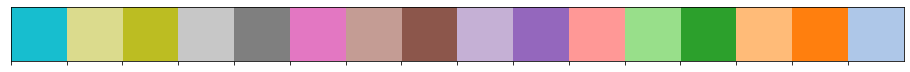

In [2]:
from matplotlib import rcParams
import seaborn as sns

colors = sns.color_palette('rocket', n_colors=12)
colors = sns.color_palette("tab10", n_colors=12)
colors = sns.color_palette("tab20_r", 16)
sns.palplot(colors)
sns.set_style("darkgrid")

In [3]:
cwd = os.getcwd()

## Implementing linear regression in python

The rest of this notebook is focussed only on using a classic linear regression approach.

Let's make some random data for us to work on.

### Exemple 1

In [4]:
x = np.random.normal(size = 40)
y = 1.6*x + np.random.normal(size = 40)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

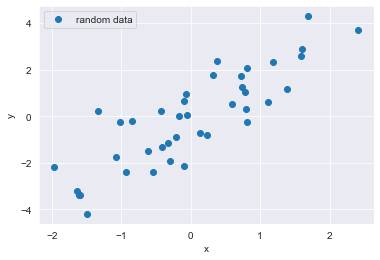

In [5]:
plt.plot(x, y, 'o', label='random data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

1.6351123740422053

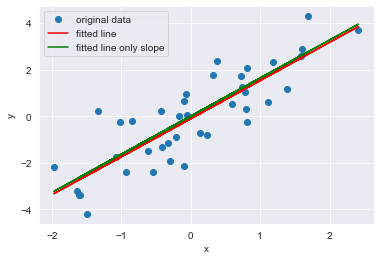

In [6]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.plot(x, slope*x, 'green', label='fitted line only slope')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend();
slope

In [7]:
print(f"La pente de la droite y= ax + b est {slope}")

La pente de la droite y= ax + b est 1.6351123740422053


In [8]:
print(f"L'ordonnée à l'origine de la droite y= ax + b est {intercept}")

L'ordonnée à l'origine de la droite y= ax + b est -0.10219025844448303


### Exemple 2

* conduct a linear regresison for the arrays y2, y2 below
* print slope, intercept, correlation coefficient
* make a scatter plot of the data and the fitted regression model

In [9]:
x2 = np.array([ 0.22827309,  1.0268903 , -0.83958485, -0.59118152, -0.9568883 ,
       -0.22232569, -0.61991511,  1.83790458, -2.05323076,  0.86858305,
       -0.92073444, -0.23231186,  2.1529569 , -1.33466147,  0.07637965,
       -1.24608928,  1.20227231, -1.04994158,  1.05661011, -0.41967767,
        2.29484234, -2.59448738,  2.8227564 ,  0.68088892, -1.57769345,
       -1.97625359,  0.53333982, -0.29086971, -0.51351967,  1.98262608,
        0.22600105, -1.83990496,  1.60767083,  0.38829194,  0.39973206,
        0.4054766 ,  0.21700177, -0.6334391 ,  0.24662153, -1.93954552])

y2 = np.array([-0.18269538, -3.2202988 ,  1.33454079,  0.0630553 ,  1.6085824 ,
       -0.21392876,  0.58013809, -2.95481368,  2.772595  ,  0.88925045,
        2.29120304,  1.96443982, -3.42629745,  3.35625955,  1.07883913,
        1.24503731, -2.10728298,  1.65268524, -1.57941313,  1.73556883,
       -2.25436816,  3.15079347, -5.2922891 , -0.57261505,  0.89058007,
        2.88268935, -0.22134391,  0.95599233,  1.17298232, -3.20390167,
       -0.64017069,  0.32593461, -1.32103579,  0.6240868 , -0.35272815,
       -1.49437497,  0.20989395,  0.27261366, -0.40530206,  4.48897751])

In [10]:
slope2, intercept2, r_value2, p_value2, std_err2, = linregress(x2, y2)

0.8510617375350347
Coefficent de corrélation : (-0.8887557239380882, 1.9238922670275166e-14)
-0.88 indique qu'une augmentation de l'un entrainera une diminution de l'autre. -1 étant la parfaite corrélation


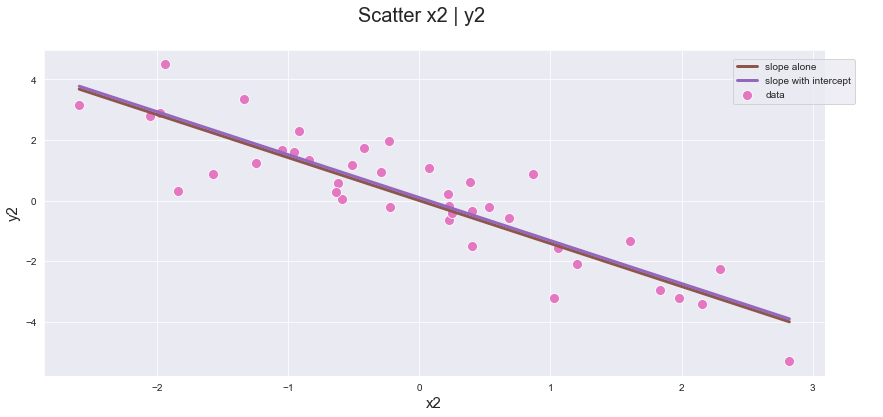

In [11]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Scatter x2 | y2", fontsize=20)
sns.set_style("darkgrid")
ax = fig.subplots()

ax = sns.scatterplot(
    x=x2, 
    y=y2,
    color=colors[5],
    alpha=1,
    s=100
)
ax = sns.lineplot(
    x=x2, 
    y=x2*slope2,
    color=colors[7], 
    lw=3
)
ax = sns.lineplot(
    x=x2, 
    y=x2*slope2 + intercept2,
    color=colors[9],
    lw=3
)

ax.set_xlabel("x2", loc="center", fontsize=15)
ax.set_ylabel("y2", loc="center", fontsize=15)#, c=colors[color1])
fig.legend([ "slope alone","slope with intercept", "data"],loc=(0.83, 0.75))

print(r_value)
coef = scipy.stats.pearsonr(x2, y2)
print(f"Coefficent de corrélation : {coef}")
print(f"-0.88 indique qu'une augmentation de l'un entrainera une diminution de l'autre. -1 étant la parfaite corrélation")

## Four different datasets: different regression results?

We can be tempted to pass the exploratory data analysis step and directly apply a linear regression model to find quick results.

### Task 1

The file four_datasets.csv in the folder data contains four small datasets. Find a linear regression model four each of the four sets, **without plotting the data first**. Compare the coefficients. What do you conclude base on this?

In [12]:
def import_df(name):
    filename = name
    df = pd.read_csv(cwd + "/data/" + filename)
    return df

In [13]:
df_four = import_df("four_datasets.csv")

In [14]:
df_four

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [15]:
df = df_four

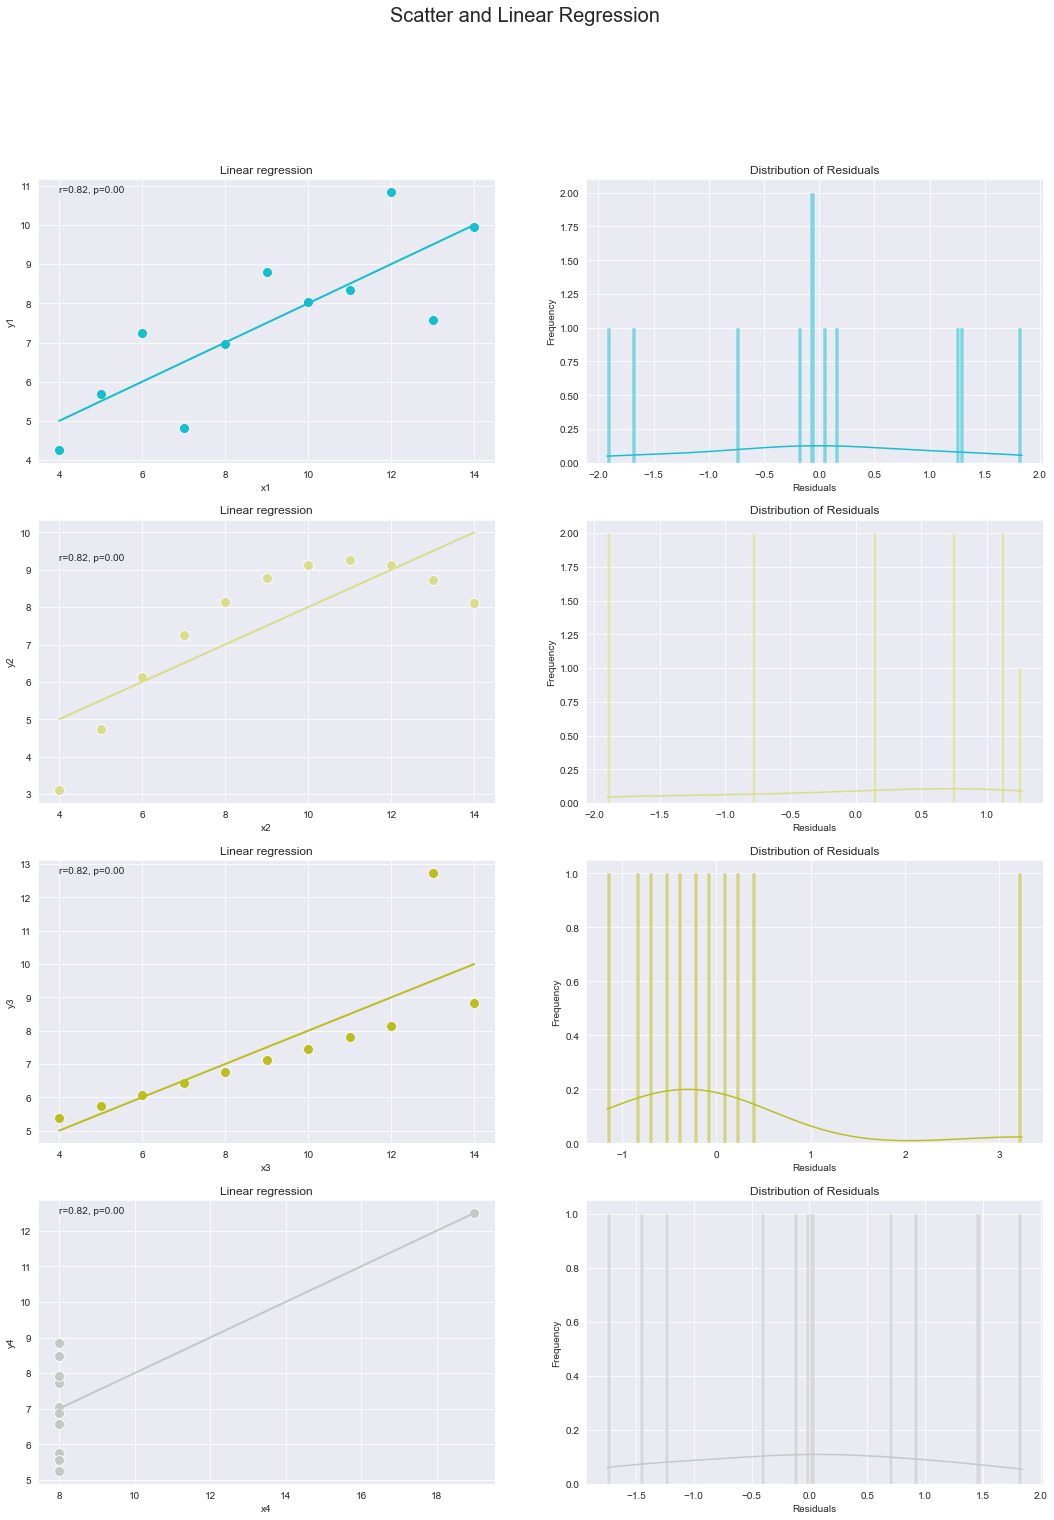

In [16]:
num_sets = len(df.columns) // 2
fig, ax = plt.subplots(nrows=num_sets, ncols=2, figsize=(18, 6*num_sets))
fig.suptitle("Scatter and Linear Regression", fontsize=20)

cols = df.columns

for i in range(num_sets):
    x_col = cols[i*2]
    y_col = cols[i*2+1]
    slope, intercept, r_value, p_value, std_err = linregress(df[x_col], df[y_col])
    
    y_pred = intercept + slope * df[x_col]    
    residuals = df[y_col] - y_pred

    
    sns.scatterplot(
        ax=ax[i,0],
        x=x_col,
        y=y_col,
        data=df,
        color=colors[i],
        alpha=1,
        s=100
    )
    
    sns.lineplot(
        ax=ax[i, 0],
        x=df[x_col], 
        y=intercept + slope * df[x_col],
        color=colors[i], 
        lw=2
        )
    
    ax[i,0].set_xlabel(x_col)
    ax[i,0].set_ylabel(y_col)
    ax[i,0].text(df[x_col].min(), df[y_col].max(), f"r={r_value:.2f}, p={p_value:.2f}")
    ax[i,0].set_title("Linear regression")
    
    sns.histplot(
        ax=ax[i][1],
        x=residuals,
        color=colors[i],
        alpha=0.5,
        bins=100,
        kde=True
    )
    
    ax[i][1].set_xlabel("Residuals")
    ax[i][1].set_ylabel("Frequency")
    ax[i][1].set_title("Distribution of Residuals")


### task 2

#### Statsmodels package 

Although the scipy package offers many statistical functions, there are more specialised statistical packages on offer such as **statsmodels**. This package allows you to complete linear regression as well as many other statistical methods and test. You can browse its offerings [here](https://www.statsmodels.org/stable/index.html). It uses a syntax and has output close to that of the **R** language and ecosystem, which is specialised statistical software/language.

https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

In [17]:
x = sm.add_constant(x) # an intercept term to the model
model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     99.83
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           3.49e-12
Time:                        22:17:11   Log-Likelihood:                -58.766
No. Observations:                  40   AIC:                             121.5
Df Residuals:                      38   BIC:                             124.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1022      0.171     -0.599      0.5

To help understand the output, write down what the terms being reported mean:
* R-squared
* coef (regression coefficient)
* std err (standard error)
* P>|t| (p-value)
* [0.025 0.975] (confidence intervals)

Write down what *least squares* regression is.

NOTE: ISLR introductory chapters explain most of these. If not look them up online.

-----

-----

## Excercise 2 - looking for associations in Emergency Departments

Emergency departments across the westernised world are suffering from increasing number of patient visits and find themselves more often overcrowded. 
Overcrowding has been linked to worse patient health outcomes and waiting times within hospital. 
The search to understand why this is occuring and what can be done to alleviate overcrowding is currently an [active area of research](https://emj.bmj.com/content/early/2019/11/25/emermed-2018-207917).

One theory is that if the main hospital is full then patients will be forced to stay in the Emergency Department as they cannot be moved into the main hospital. 
This may result in the Emergency Department becoming overcrowded. 
In the UK patients who are medically fit to return home but are still in hospital are reffered to as 'delayed transfers of care' (or DTOCS for short). 
The number of occurances of this is measured in hospitals. 
The number of long waiting times in Emergency Departments (longer than 4 hours) are also recorded.

Your job is to understand if there is a relationship between the numbers of DTOCS and the numbers of long-waits in Emergency Departments.

In [18]:
def load_dtoc_dataset():
    '''
    Loads the long_wait and dtoc data sets into memory
    Returns a tuple of numpy.ndarrays representing
    breach and dtoc dataset respectively.
    '''
    #note we use skip_header because the dataset has column descriptors
    dtocs = np.genfromtxt('./data/dtocs.csv', skip_header=1)
    long_waits = np.genfromtxt('./data/long_waits.csv', skip_header=1)
    return long_waits, dtocs
    
    
long_waits, dtocs = load_dtoc_dataset()

In [19]:
long_waits;

In [20]:
print(f"On mesure en échantillon de --> {len(long_waits)} <-- patients")

On mesure en échantillon de --> 80 <-- patients


#### Pre traitement

In [21]:
slope, intercept, r_value, p_value, std_err = linregress(dtocs, long_waits)

In [22]:
x = sm.add_constant(dtocs) # an intercept term to the model
model = sm.OLS(long_waits, x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     194.6
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           6.80e-23
Time:                        22:17:11   Log-Likelihood:                -945.02
No. Observations:                  80   AIC:                             1894.
Df Residuals:                      78   BIC:                             1899.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.633e+05      2e+04     -8.178      0.0

-------

-------

In [23]:
print(results.summary())
CI = results.conf_int()
CI_x1 = CI[1]
CI_const = CI[0]

#### Analayse graphique

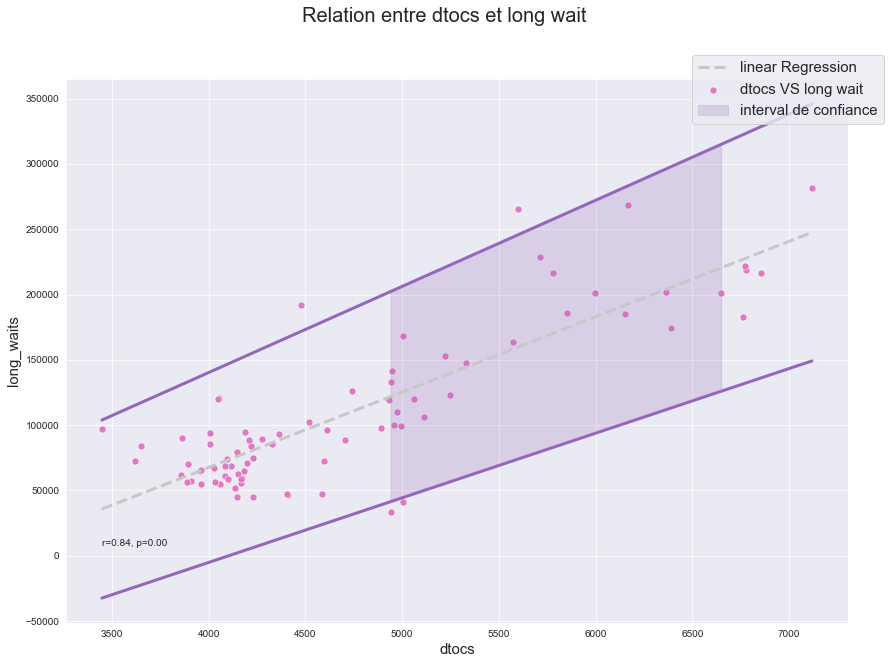

In [24]:
x = sm.add_constant(dtocs) # an intercept term to the model
model = sm.OLS(long_waits, x)
results = model.fit()

print(results.summary())
CI = results.conf_int()
CI_x1 = CI[1]
CI_const = CI[0]

fig, ax = plt.subplots(figsize=(14,10))
fig.suptitle("Relation entre dtocs et long wait", fontsize=20)

sns.scatterplot(
    ax=ax,
    x = dtocs,
    y = long_waits,
    color=colors[5],
    s=50,
    label="dtocs VS long wait"
)
sns.lineplot(
    ax=ax,
    x=dtocs, 
    y=intercept + slope * dtocs,
    color=colors[i], 
    lw=3,
    linestyle="--",
    label="linear Regression"
)

# Plot the confidence interval 

sns.lineplot(
    ax=ax,
    x=dtocs, 
    y=CI_const[0] + CI_x1[0] * dtocs,
    color=colors[9], 
    lw=3,
    linestyle="-",
)
sns.lineplot(
    ax=ax,
    x=dtocs, 
    y=CI_const[1] + CI_x1[1] * dtocs,
    color=colors[9], 
    lw=3,
    linestyle="-",
)
plt.fill_between(
    dtocs, 
    CI_const[0] + CI_x1[0] * dtocs,
    CI_const[1] + CI_x1[1] * dtocs, 
    where=CI_const[0] + CI_x1[0] * dtocs<CI_const[1] + CI_x1[1] * dtocs, 
    color=colors[9], 
    alpha=0.2,     
    label = "interval de confiance")


ax.set_xlabel("dtocs", fontsize=15)
ax.set_ylabel("long_waits", fontsize=15)
ax.text(dtocs.min(), dtocs.max(), f"r={r_value:.2f}, p={p_value:.2f}")
ax.legend(bbox_to_anchor=(1.05, 1.05), loc=1, borderaxespad=0.2, fontsize=15)

#### Rework using time difference

Another data scientist informs you that there is a problem using linear regression when the data is a time series. A basic way of dealing with this issue is to take a first difference of the data.
https://towardsdatascience.com/how-to-model-time-series-data-with-linear-regression-cd94d1d901c0

You must:
* Create a new numpy array which contains the first differenced values of the long_waits array
* Create a new numpy array which contains the first differenced values of the DTOCS array
* Plot the data as a scatter plot
* Perform linear regression using statsmodels on this differenced data
* add your regression line to the scatter plot
* describe what the p-values, confidence intervals and r-squared values indicate.

HINT

* Numpy contains a function called ```np.diff()``` that might help

In [25]:
long_waits_diff = np.diff(long_waits)
dtocs_diff = np.diff(dtocs)

In [26]:
slope, intercept, r_value, p_value, std_err = linregress(dtocs_diff, long_waits_diff)

In [27]:
x = sm.add_constant(dtocs_diff) # an intercept term to the model
model = sm.OLS(long_waits_diff, x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.775
Date:                Sat, 01 Apr 2023   Prob (F-statistic):             0.0998
Time:                        22:17:11   Log-Likelihood:                -901.09
No. Observations:                  79   AIC:                             1806.
Df Residuals:                      77   BIC:                             1811.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2417.0761   2484.505      0.973      0.3

In [28]:
CI = results.conf_int()
CI_x1 = CI[1]
CI_const = CI[0]

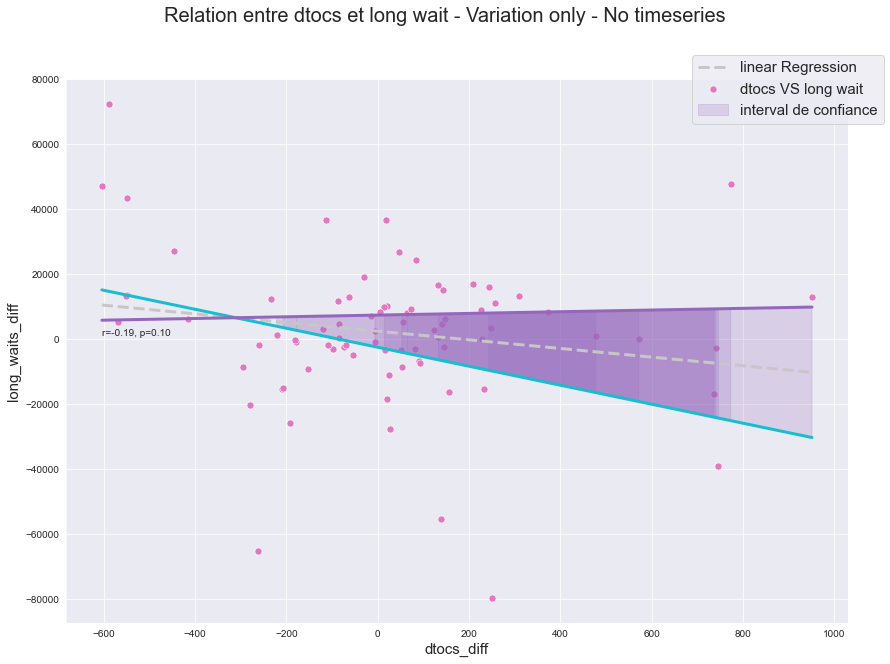

In [29]:
fig, ax = plt.subplots(figsize=(14,10))
fig.suptitle("Relation entre dtocs et long wait - Variation only - No timeseries", fontsize=20)

dtocs = dtocs_diff
long_waits = long_waits_diff

sns.scatterplot(
    ax=ax,
    x = dtocs,
    y = long_waits,
    color=colors[5],
    s=50,
    label="dtocs VS long wait"
)
sns.lineplot(
    ax=ax,
    x=dtocs, 
    y=intercept + slope * dtocs,
    color=colors[i], 
    lw=3,
    linestyle="--",
    label="linear Regression"
)

# Plot the confidence interval 

sns.lineplot(
    ax=ax,
    x=dtocs, 
    y=CI_const[0] + CI_x1[0] * dtocs,
    color=colors[0], 
    lw=3,
    linestyle="-",
)
sns.lineplot(
    ax=ax,
    x=dtocs, 
    y=CI_const[1] + CI_x1[1] * dtocs,
    color=colors[9], 
    lw=3,
    linestyle="-",
)
plt.fill_between(
    dtocs, 
    CI_const[0] + CI_x1[0] * dtocs,
    CI_const[1] + CI_x1[1] * dtocs, 
    where=CI_const[0] + CI_x1[0] * dtocs<CI_const[1] + CI_x1[1] * dtocs, 
    color=colors[9], 
    alpha=0.2,     
    label = "interval de confiance")


ax.set_xlabel("dtocs_diff", fontsize=15)
ax.set_ylabel("long_waits_diff", fontsize=15)
ax.text(dtocs.min(), dtocs.max(), f"r={r_value:.2f}, p={p_value:.2f}")
ax.legend(bbox_to_anchor=(1.05, 1.05), loc=1, borderaxespad=0.2, fontsize=15)

-------

------

## Residual plots
For completenes we need to consider if the assumptions we made when implementing our linear regression are valid. According to **ISTL**
> When we fit a linear regression model to a particular data set, many problems may occur. Most common among these are the following:
> 1. Non-linearity of the response-predictor relationships.
> 2. Correlation of error terms.
> 3. Non-constant variance of error terms.
4. Outliers.
5. Collinearity.
>
> In practice, identifying and overcoming these problems is as much an
art as a science. Many pages in countless books have been written on this
topic. Since the linear regression model is not our primary focus here, we
will provide only a brief summary of some key points

If you need to know about this in future a good place to start is the overview of these problems **ISLR** section *3.3.3.*. 

Here we will now focus on how to produce some of the diagnostic plots in python which help us assess these issues. In my experience producing these plots in python sometimes takes a lot more thought/work than using R packages which are specialised for this kind of statistical work. 

Some other resources:

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

https://www.statsmodels.org/stable/diagnostic.html

https://towardsdatascience.com/how-to-use-residual-plots-for-regression-model-validation-c3c70e8ab378

In [30]:
df = pd.DataFrame({'dtocs_diff': dtocs_diff, 'long_waits_diff': long_waits_diff})
df.columns

Index(['dtocs_diff', 'long_waits_diff'], dtype='object')

### 1. Non-linearity of the Data

/var/folders/vs/63szyqqn4dq91nzk275599p40000gn/T/ipykernel_55917/1699143599.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


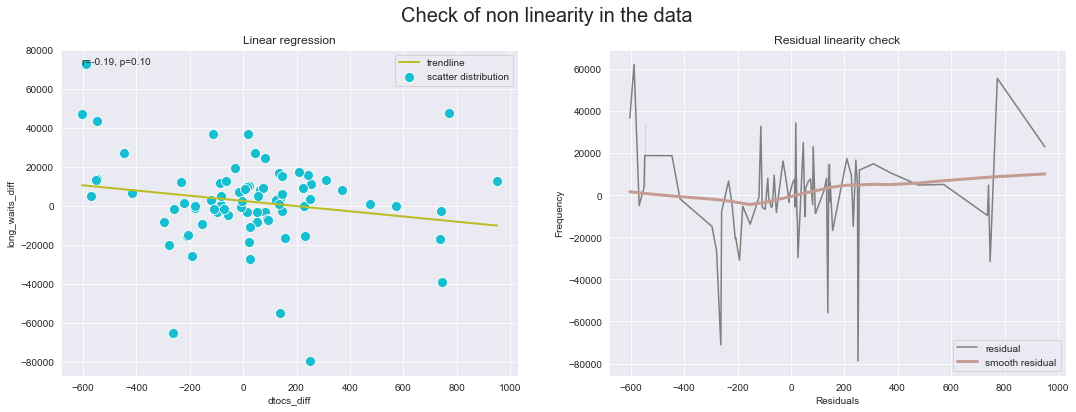

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("Check of non linearity in the data", fontsize=20)

cols = df.columns

x_col = cols[0]
y_col = cols[1]
slope, intercept, r_value, p_value, std_err = linregress(df[x_col], df[y_col])

y_pred = intercept + slope * df[x_col]    
residuals = df[y_col] - y_pred
lowess = sm.nonparametric.lowess(residuals, df[x_col], frac=0.9)



sns.scatterplot(
    ax=ax[0],
    x=x_col,
    y=y_col,
    data=df,
    color=colors[0],
    alpha=1,
    s=100,
    label="scatter distribution"
)

sns.lineplot(
    ax=ax[0],
    x=df[x_col], 
    y=intercept + slope * df[x_col],
    color=colors[2], 
    lw=2,
    label="trendline"
    )

ax[0].set_xlabel(x_col)
ax[0].set_ylabel(y_col)
ax[0].text(df[x_col].min(), df[y_col].max(), f"r={r_value:.2f}, p={p_value:.2f}")
ax[0].set_title("Linear regression")

sns.lineplot(
    ax=ax[1],
    y=residuals,
    x=x_col,
    data=df,
    color=colors[4],
    alpha=1,
    label="residual"
)
sns.lineplot(
    ax=ax[1],
    y=lowess[:,1],
    x=lowess[:,0],
    color=colors[6],
    alpha=1,
    lw=3,
    label="smooth residual"
)

ax[1].set_xlabel("Residuals")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Residual linearity check")
fig.show()

----

----

### 2. Normally residuals distribution

/var/folders/vs/63szyqqn4dq91nzk275599p40000gn/T/ipykernel_55917/2939489400.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


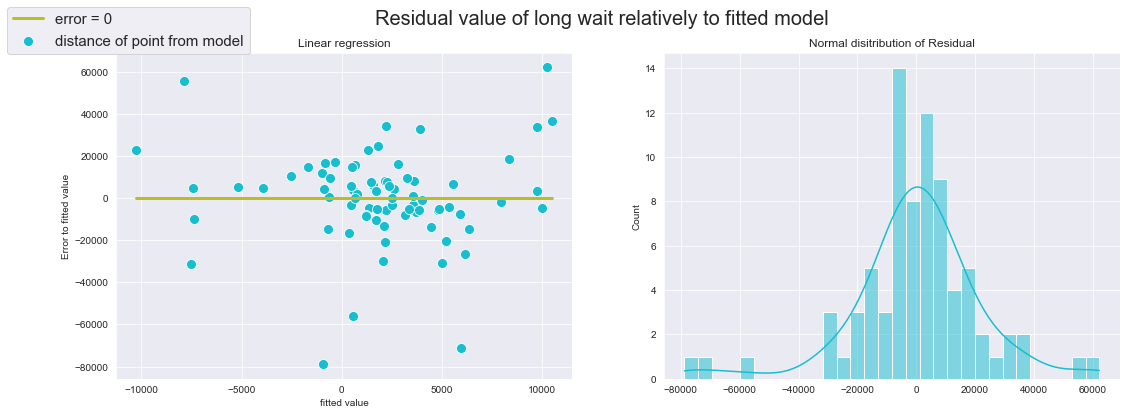

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("Residual value of long wait relatively to fitted model", fontsize=20)

results.resid;
results.fittedvalues;


sns.scatterplot(
    ax=ax[0],
    x=results.fittedvalues,
    y=results.resid,
    data=df,
    color=colors[0],
    alpha=1,
    s=100,
    label="distance of point from model",
)

sns.lineplot(
    ax=ax[0],
    x=results.fittedvalues, 
    y=np.zeros(len(results.fittedvalues)),
    color=colors[2], 
    lw=3,
    label="error = 0"
    )

sns.histplot(
    ax=ax[1],
    x=results.resid,
    
    color=colors[0],
    alpha=0.5,
    bins=30,
    kde=True,
)


ax[0].set_ylabel("Error to fitted value")
ax[0].set_xlabel("fitted value")
ax[0].set_title("Linear regression")
ax[0].legend(bbox_to_anchor=(0.3, 1.15), loc=1, borderaxespad=0.2, fontsize=15)

ax[1].set_title("Normal disitribution of Residual")


fig.show()


------

------

/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


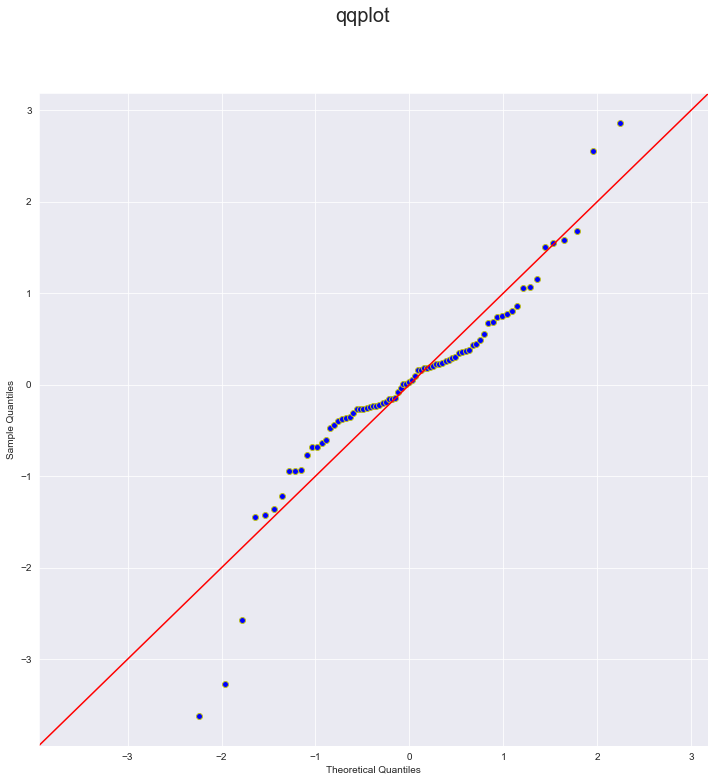

In [33]:
fig, ax = plt.subplots(figsize=(12,12))
fig.suptitle("qqplot", fontsize=20)

# Generate a probability plot of the residuals
sm.qqplot(
    ax=ax,
    data=results.resid,
    line="45",
    fit=True,
    color=colors[2]
)

# Add a grid to the plot
plt.grid(True)

-----

-----

### 3. Non-constant Variance of Error Terms

In [34]:
results

/var/folders/vs/63szyqqn4dq91nzk275599p40000gn/T/ipykernel_55917/32599670.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


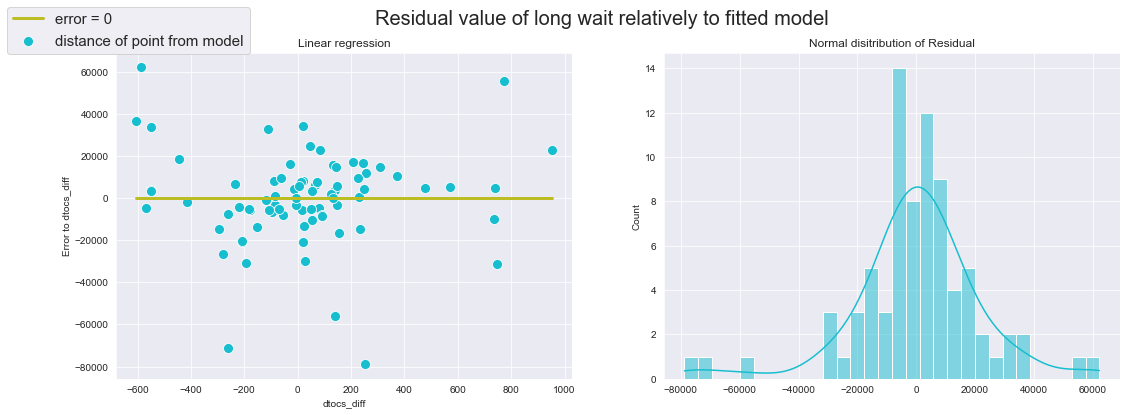

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("Residual value of long wait relatively to fitted model", fontsize=20)


results.resid;
results.fittedvalues;


sns.scatterplot(
    ax=ax[0],
    x=df["dtocs_diff"],
    y=results.resid,
    data=df,
    color=colors[0],
    alpha=1,
    s=100,
    label="distance of point from model",
)

sns.lineplot(
    ax=ax[0],
    x=df["dtocs_diff"], 
    y=np.zeros(len(results.fittedvalues)),
    color=colors[2], 
    lw=3,
    label="error = 0"
    )

sns.histplot(
    ax=ax[1],
    x=results.resid,
    
    color=colors[0],
    alpha=0.5,
    bins=30,
    kde=True,
)


ax[0].set_ylabel("Error to dtocs_diff")
ax[0].set_xlabel("dtocs_diff")
ax[0].set_title("Linear regression")
ax[0].legend(bbox_to_anchor=(0.3, 1.15), loc=1, borderaxespad=0.2, fontsize=15)

ax[1].set_title("Normal disitribution of Residual")


fig.show()


-----

-----

## Variable selection

Usually we may have multiple measurements and we are unsure which are able to best explain the variable we are trying to predict. Then we use *multiple* linear regression to determine which variables are important.

For example we can consdier the effect of advertising budgets for various media on overall sales of a product. See **ISLR** chapter 3. Here TV, Radio and Newspaper are individual advertising budgets and sales is the total numbers of a produce sold.

In [36]:
advertising = pd.read_csv('./data/Advertising.csv', usecols=[1,2,3,4])
advertising.shape

(200, 4)

- On compare une Série avec un Dataframe ie y = f(x1, x2, ..., xn)
- Etudes de l'impact de différent paramètre sur une variable

# Excercise 3: Finding alcohol content of wine using other characteristics

You will find a data set containing attributes of different types of wine in `wine.csv` in the data folder. Your task is to find which other variables are important in explaining the alcohol content.

You must:
* perform a linear regression using all the varaibles
* write a piece of code to implement backwards selection.

Your solution, at each stage of the selection, must:
* print the name of the variable removed
* print the adjusted r-squared
* return the coefficient and p-value results of each variable

You must use your code output to answer:
* How many variables have been removed to end with only significant varaibles?
* Which varaibles remain in your model?

HINT
* assume the stopping rule is that you stop when there are only significant varaibles contained in your model)


In [139]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [140]:
def perform_linear_regression(Y,X):
    """
    Function performs linear regression, prints adjusted r-squared and coef table, and returns the model results object.
    
    Input
    =====
    Y, padnas series,
    X, padnas dataframe,
    
    Return
    ======
    results, statsmodel linear regression results object
    
    """
    # fit multiple linear regression model
    X = sm.add_constant(X) # an intercept term to the model
    model = sm.OLS(Y, X)
    results = model.fit()
    # print results
    print('Adjusted R-squared: {0:1.3f}'.format(results.rsquared_adj))
    print(results.summary().tables[1])
    return(results)

In [141]:
df_wine = import_df("wine.csv")

In [142]:
df_wine.isna().value_counts()

Grape  Alcohol  Malic acid  Ash    Alcalinity of ash  Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity  Hue    OD280/OD315 of diluted wines  Proline
False  False    False       False  False              False      False          False       False                 False            False            False  False                         False      178
dtype: int64

In [143]:
alcohol = df_wine["Alcohol"]
df_wine.drop(columns="Alcohol", inplace=True)

In [144]:
print(f"there are --> {len(df_wine.columns)} <-- to be tested")

there are --> 13 <-- to be tested


In [145]:
perform_linear_regression(alcohol, df_wine)

Adjusted R-squared: 0.587
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.1726      0.374      3.136      0.002       0.434       1.911
Grape                           -0.6052      0.191     -3.164      0.002      -0.983      -0.227
Malic acid                       0.1906      0.061      3.140      0.002       0.071       0.310
Ash                              0.0187      0.072      0.260      0.795      -0.123       0.160
Alcalinity of ash               -0.0649      0.077     -0.847      0.398      -0.216       0.086
Magnesium                       -0.0045      0.058     -0.079      0.937      -0.118       0.109
Total phenols                    0.0934      0.102      0.917      0.360      -0.108       0.294
Flavanoids                      -0.2152      0.147     -1.467      0.144      -0.505       0.074
Nonf

In [146]:
# p-value
criteria = 0.05

In [184]:
def regression_is_valid(Y, X, name):
    X = sm.add_constant(X) # an intercept term to the model
    model = sm.OLS(Y, X)
    results = model.fit()
    # print results
    # print('Adjusted R-squared: {0:1.3f}'.format(results.rsquared_adj))
    #print(results.summary().tables[1])
    
    p_values = results.pvalues  # get the p-values
    grape_p_value = p_values.iloc[1]
    
    #if p_values[0] >=0.05 or p_values[1] >= 0.05:
    if p_values[1] >= 0.05:
        print(f"Const = {results.params[0]} <----> x1_{col} = {results.params[1]}")
        print(f"p-value Const = {p_values[0]} <----> p-value x1 = {p_values[1]}")
        print(f"---> REMOVED")
        print("----------------------------------------------------------------------")
        print("")
        return False, results.rsquared_adj
    else:
        print(f"Const = {results.params[0]} <----> x1_{col} = {results.params[1]}")
        print(f"p-value Const = {p_values[0]} <----> p-value x1 = {p_values[1]}")
        print(f"---> KEEP ")
        print("----------------------------------------------------------------------")
        print("")
        return True, results.rsquared_adj

In [185]:
regression_is_valid(alcohol, df_wine["Grape"], "Grape")

Const = 0.8208005284015851 <----> x1_Proline = -0.4235434610303827
p-value Const = 3.0191949564183444e-05 <----> p-value x1 = 7.639348069890877e-06
---> KEEP 
----------------------------------------------------------------------



(True, 0.10276671403269666)

In [186]:
removedList = []
keepList = []
for col in df_wine.columns:
    print(f"------> {col} <------")
    print("")
    is_valid, rsquare = regression_is_valid(alcohol, df_wine[col], col)
    if is_valid:
        keepList.append(col)
    else:
        removedList.append(col)
    print(f"Columns removed : {len(removedList)}/{len(df_wine.columns)}")

------> Grape <------

Const = 0.8208005284015851 <----> x1_Grape = -0.4235434610303827
p-value Const = 3.0191949564183444e-05 <----> p-value x1 = 7.639348069890877e-06
---> KEEP 
----------------------------------------------------------------------

Columns removed : 0/13
------> Malic acid <------

Const = -0.0001334633441378505 <----> x1_Malic acid = 0.0939118814135384
p-value Const = 0.9985784801212532 <----> p-value x1 = 0.21215444749622595
---> REMOVED
----------------------------------------------------------------------

Columns removed : 1/13
------> Ash <------

Const = -0.00010049040427687408 <----> x1_Ash = 0.21127080387138625
p-value Const = 0.9989097608529621 <----> p-value x1 = 0.004607510085991435
---> KEEP 
----------------------------------------------------------------------

Columns removed : 1/13
------> Alcalinity of ash <------

Const = -0.00047784187164105416 <----> x1_Alcalinity of ash = -0.30978977691483733
p-value Const = 0.9946700663763799 <----> p-value x1

In [198]:
df_meaning = df_wine[keepList]
df_meaning["Grape"]

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Grape, Length: 178, dtype: int64

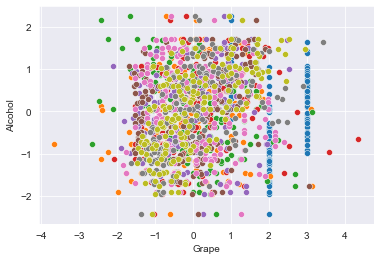

In [199]:
for col in df_meaning.columns:
    sns.scatterplot(df_meaning[col], alcohol)

In [211]:
def test_column(y_col, x_col, name):

    x = sm.add_constant(x_col) # an intercept term to the model
    model = sm.OLS(y_col, x)
    results = model.fit()
    
    #print(results.summary())
    CI = results.conf_int()
    CI_x1 = CI[1]
    CI_const = CI[0]
    
    fig, ax = plt.subplots(figsize=(14,10))
    fig.suptitle(f"Relation entre alcohol et {name}", fontsize=20)
    
    dtocs = x_col
    long_waits = y_col
    
    sns.scatterplot(
        ax=ax,
        x = dtocs,
        y = long_waits,
        color=colors[5],
        s=50,
        label="dtocs VS long wait"
    )
    sns.lineplot(
        ax=ax,
        x=dtocs, 
        y=results.params[0] + results.params[1] * dtocs,
        color=colors[i], 
        lw=3,
        linestyle="--",
        label="linear Regression"
    )
    
    # Plot the confidence interval 
    
    sns.lineplot(
        ax=ax,
        x=dtocs, 
        y=CI_const[0] + CI_x1[0] * dtocs,
        color=colors[9], 
        lw=3,
        linestyle="-",
    )
    sns.lineplot(
        ax=ax,
        x=dtocs, 
        y=CI_const[1] + CI_x1[1] * dtocs,
        color=colors[9], 
        lw=3,
        linestyle="-",
    )
    plt.fill_between(
        dtocs, 
        CI_const[0] + CI_x1[0] * dtocs,
        CI_const[1] + CI_x1[1] * dtocs, 
        where=CI_const[0] + CI_x1[0] * dtocs<CI_const[1] + CI_x1[1] * dtocs, 
        color=colors[9], 
        alpha=0.2,     
        label = "interval de confiance")
    
    
    ax.set_xlabel(f"{name}", fontsize=15)
    ax.set_ylabel("Alcohol", fontsize=15)
    #ax.text(dtocs.min(), dtocs.max(), f"r={r_value:.2f}, p={p_value:.2f}")
    ax.legend(bbox_to_anchor=(1.05, 1.05), loc=1, borderaxespad=0.2, fontsize=15)

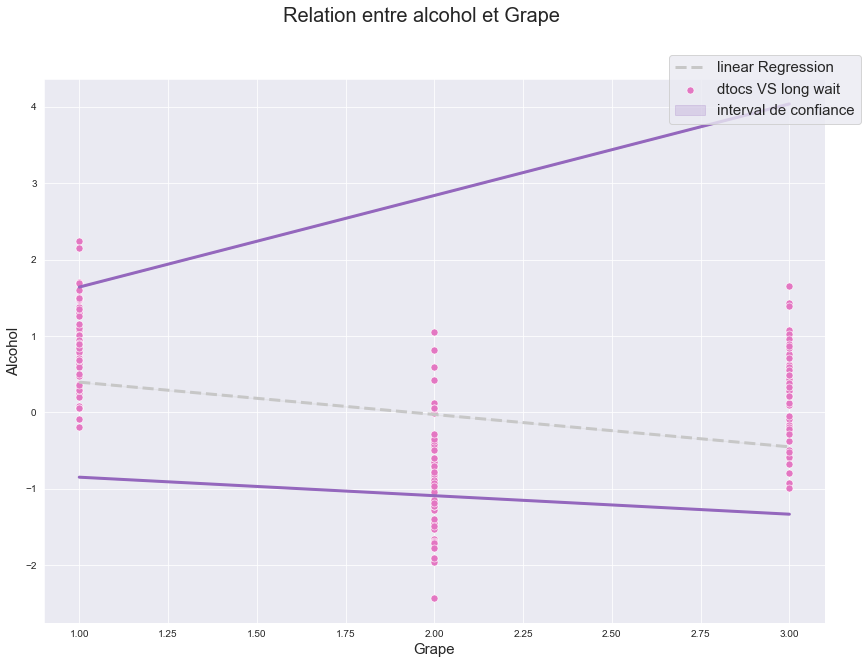

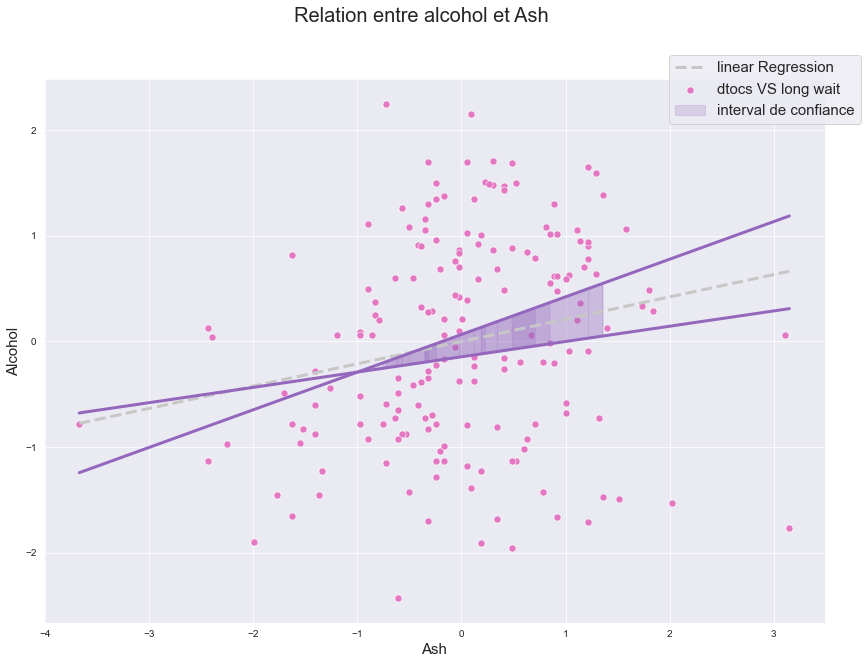

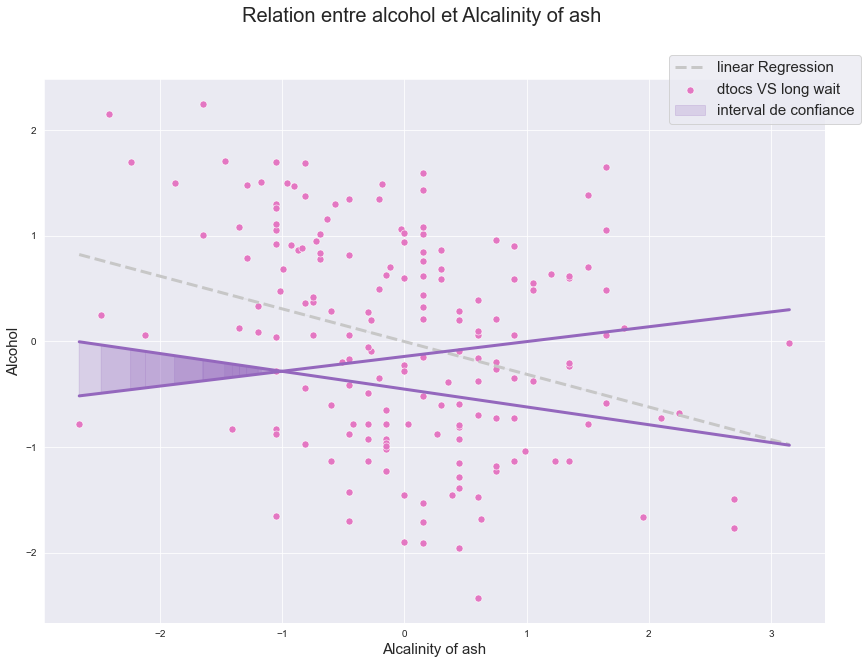

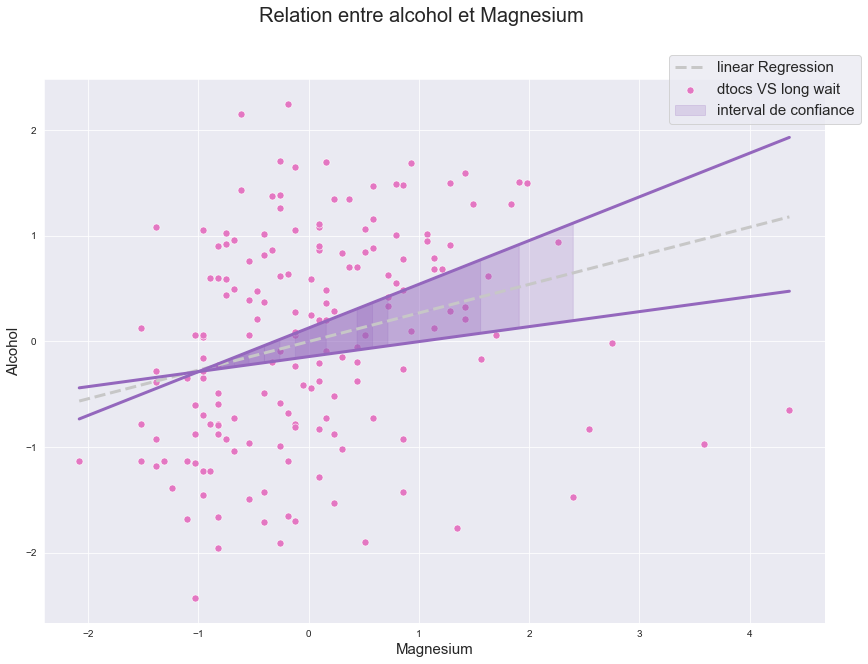

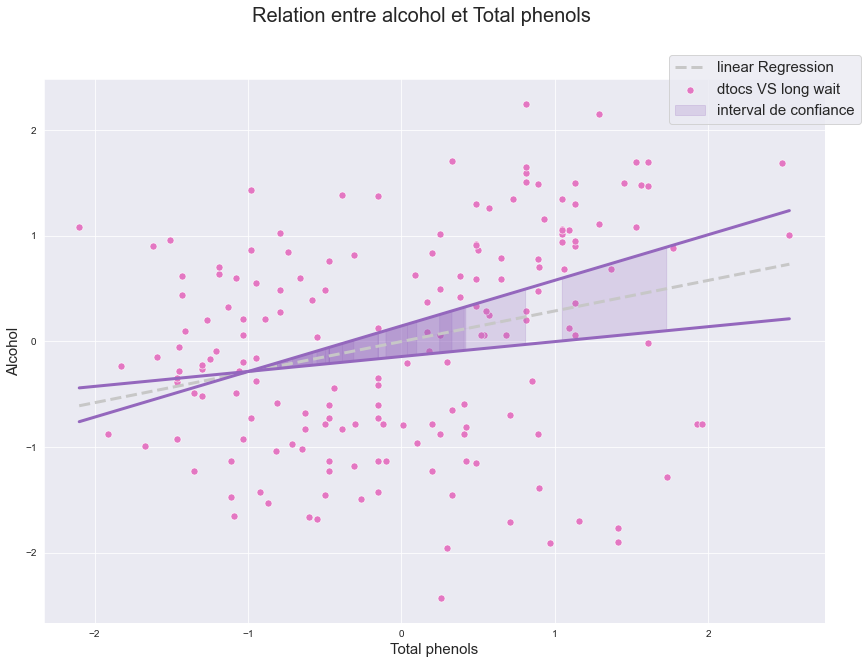

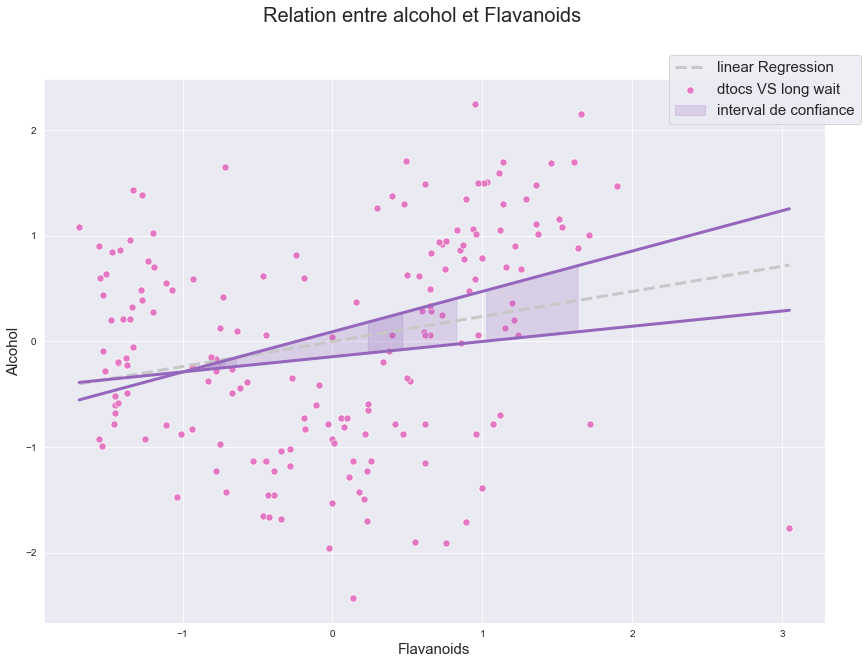

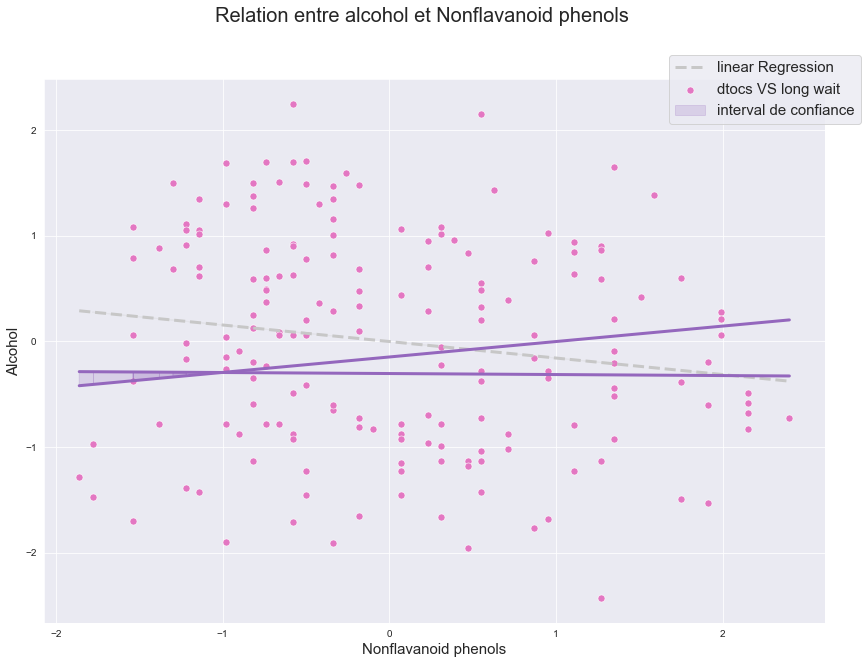

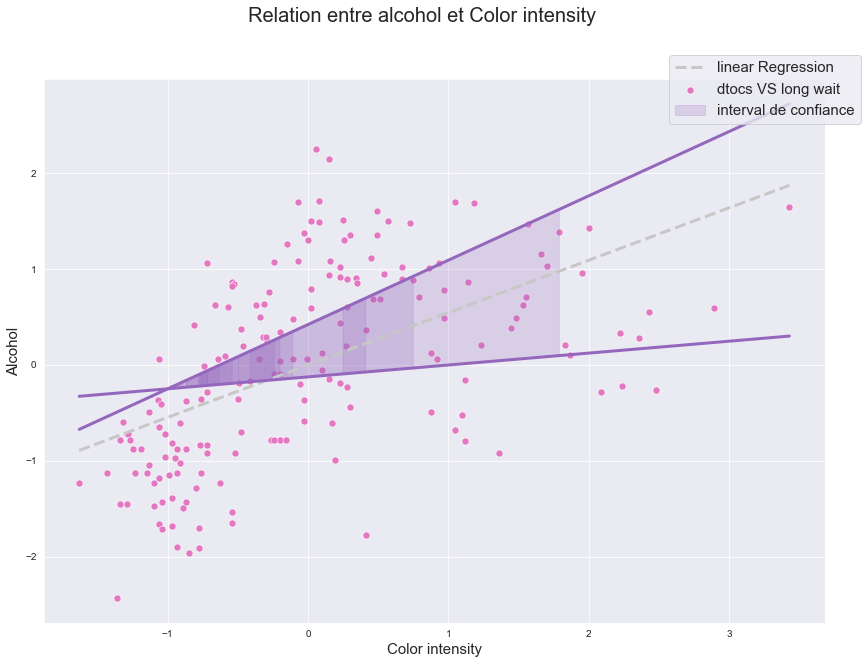

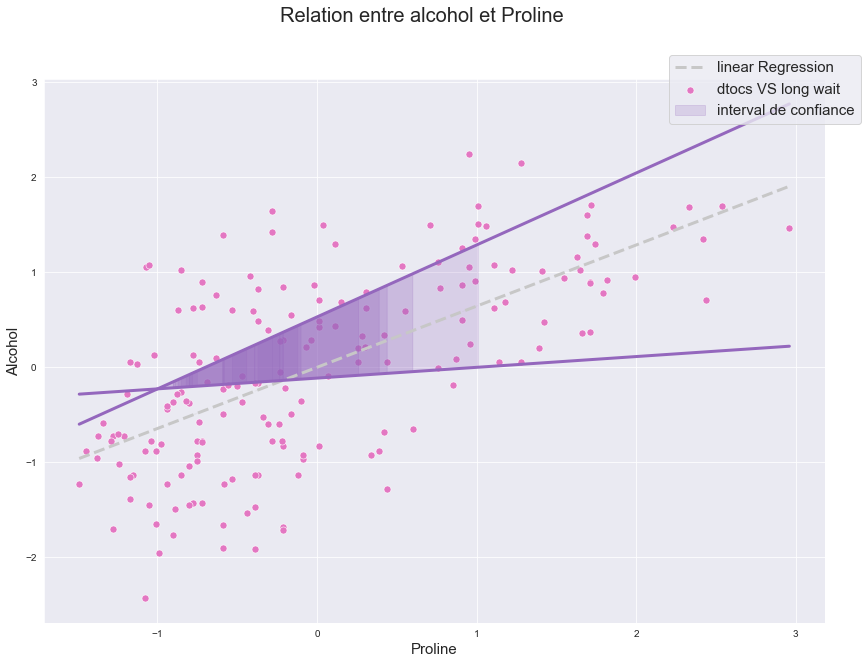

In [212]:
for col in df_meaning.columns:
    test_column(alcohol, df_meaning[col], col)